In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/raw/skill_builder_dataset.csv',  encoding='ISO-8859-1' , low_memory='False')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5016\2300783245.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/skill_builder_dataset.csv',  encoding='ISO-8859-1' , low_memory='False')


In [21]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (346860, 31)

Columns:
 ['Unnamed: 0', 'order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id', 'original', 'correct', 'attempt_count', 'ms_first_response', 'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id', 'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name', 'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time', 'template_id', 'answer_id', 'answer_text', 'first_action', 'bottom_hint', 'opportunity', 'opportunity_original']

Data Types:
 Unnamed: 0                int64
order_id                  int64
assignment_id             int64
user_id                   int64
assistment_id             int64
problem_id                int64
original                  int64
correct                   int64
attempt_count             int64
ms_first_response         int64
tutor_mode               object
answer_type              object
sequence_id               int64
student_class_id          int64
position                  int64
type  

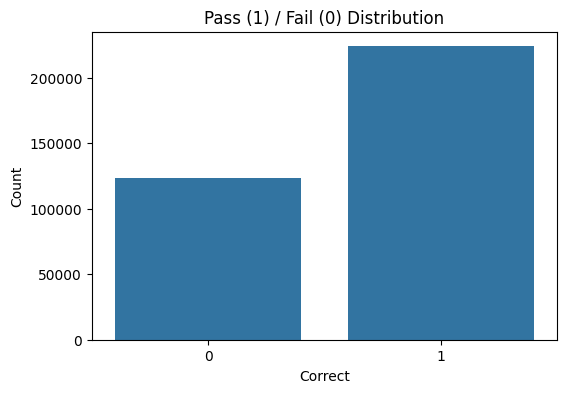

In [28]:
#  Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='correct', data=df)
plt.title('Pass (1) / Fail (0) Distribution')
plt.xlabel('Correct')
plt.ylabel('Count')
plt.savefig('../eda/pass_fail_distribution.png')
plt.show()

In [23]:
#  Numeric Columns Summary
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric Columns:\n", numeric_cols)
print("\nDescribe:\n", df[numeric_cols].describe())


Numeric Columns:
 ['Unnamed: 0', 'order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id', 'original', 'correct', 'attempt_count', 'ms_first_response', 'sequence_id', 'student_class_id', 'position', 'base_sequence_id', 'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time', 'template_id', 'answer_id', 'first_action', 'bottom_hint', 'opportunity', 'opportunity_original']

Describe:
           Unnamed: 0      order_id  assignment_id        user_id  \
count  346860.000000  3.468600e+05  346860.000000  346860.000000   
mean   211268.603659  3.060426e+07  273696.362801   83491.787026   
std    117373.737194  5.256154e+06   11062.932570    7328.617764   
min         1.000000  2.022408e+07  217900.000000      14.000000   
25%    108576.750000  2.652993e+07  266798.000000   78972.000000   
50%    219002.500000  3.105405e+07  271631.000000   80223.000000   
75%    312585.250000  3.485916e+07  279135.000000   88143.000000   
max    401756.000000  3.831020e+07  291503

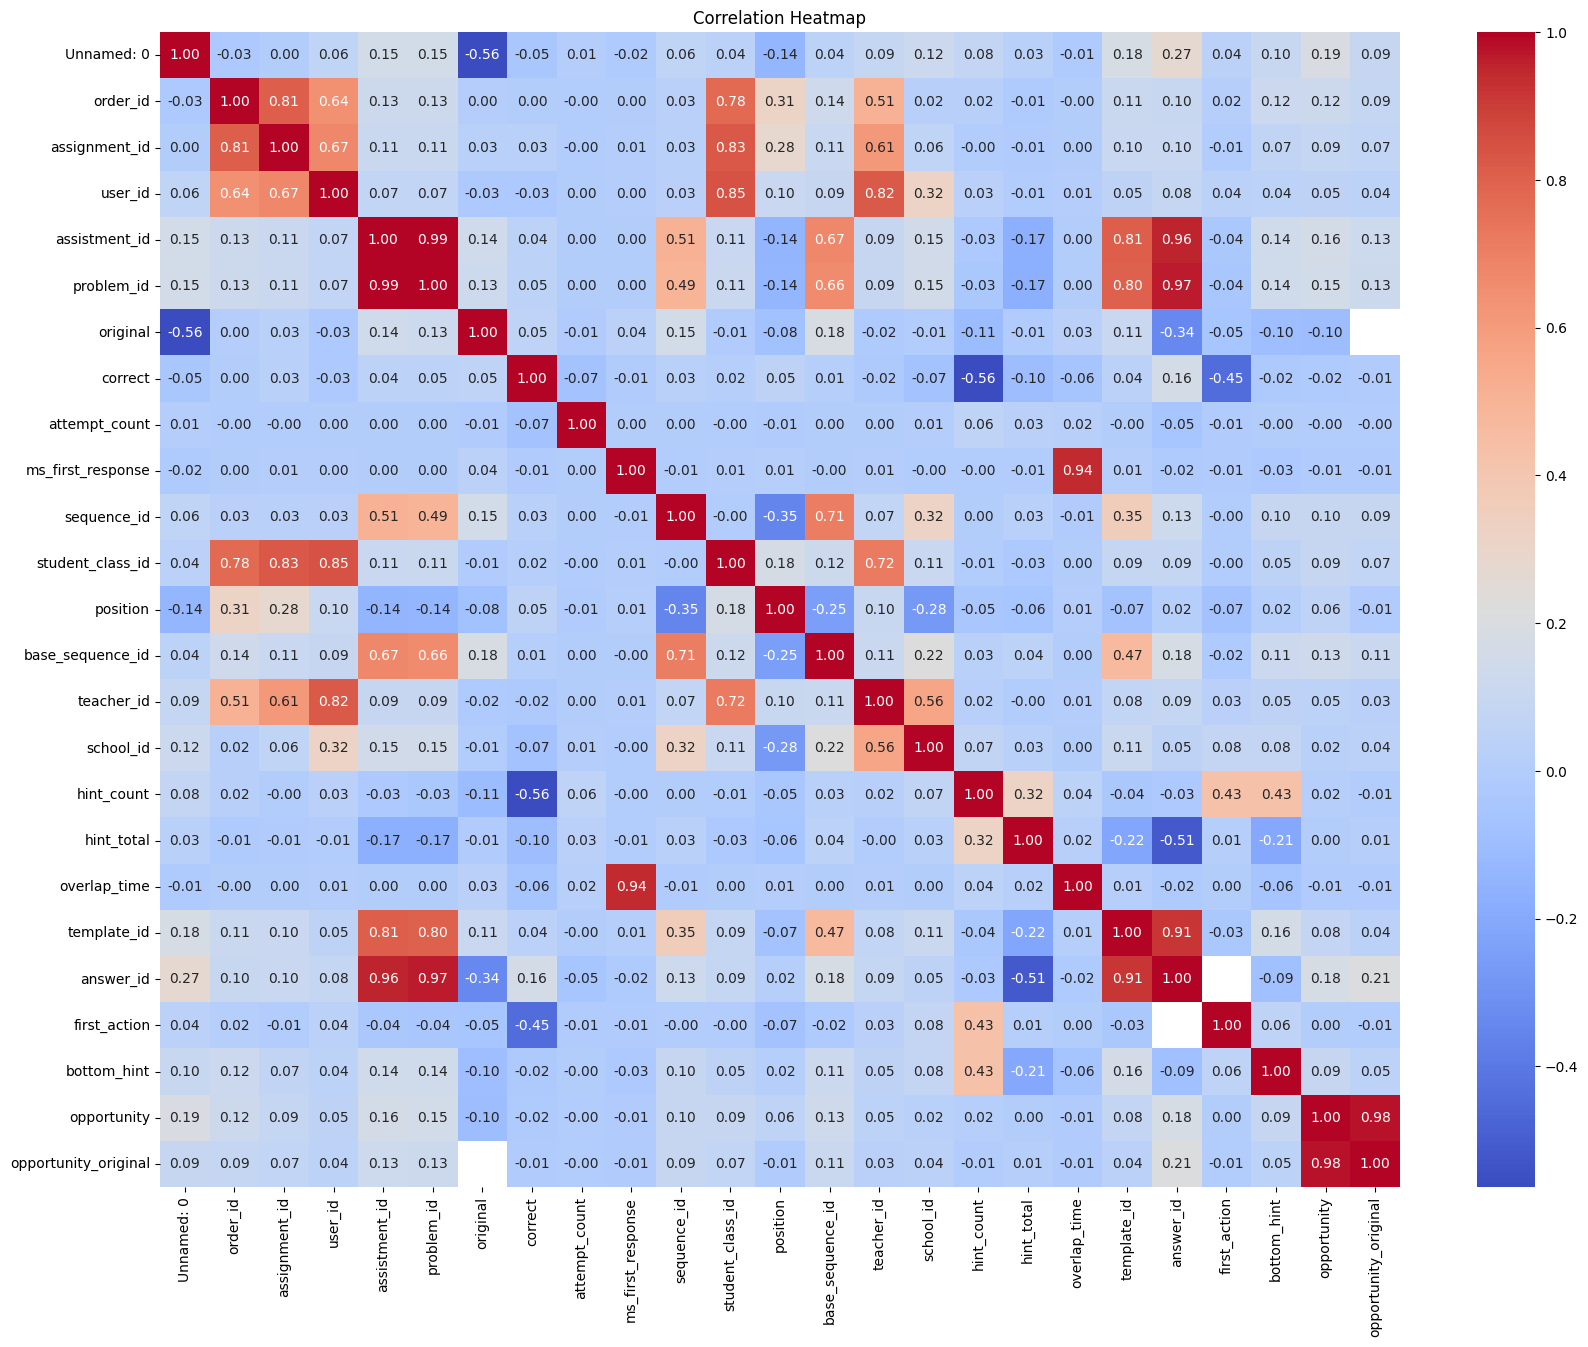

In [24]:
#  Correlation Heatmap for Numeric Columns
plt.figure(figsize=(20, 15))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('../eda/correlation_heatmap.png')
plt.show()

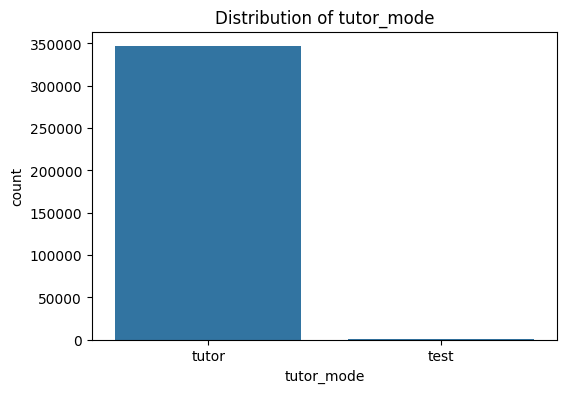

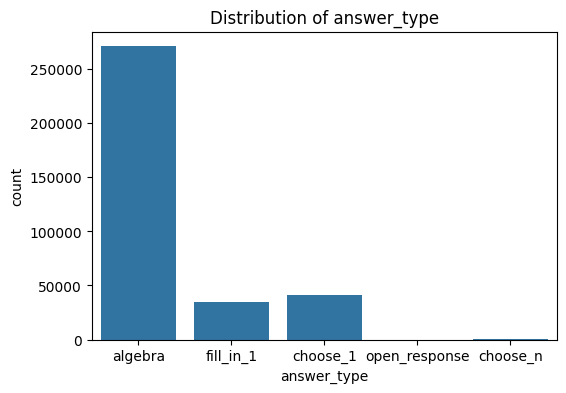

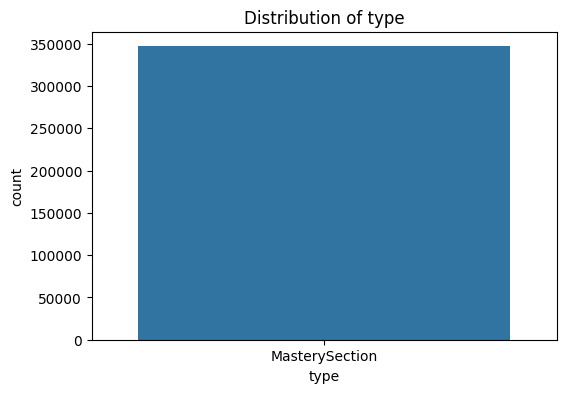

In [25]:
# Bar Plots for Key Categorical Columns
cat_cols = ['tutor_mode', 'answer_type', 'type']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'../eda/barplot_{col}.png')
    plt.show()

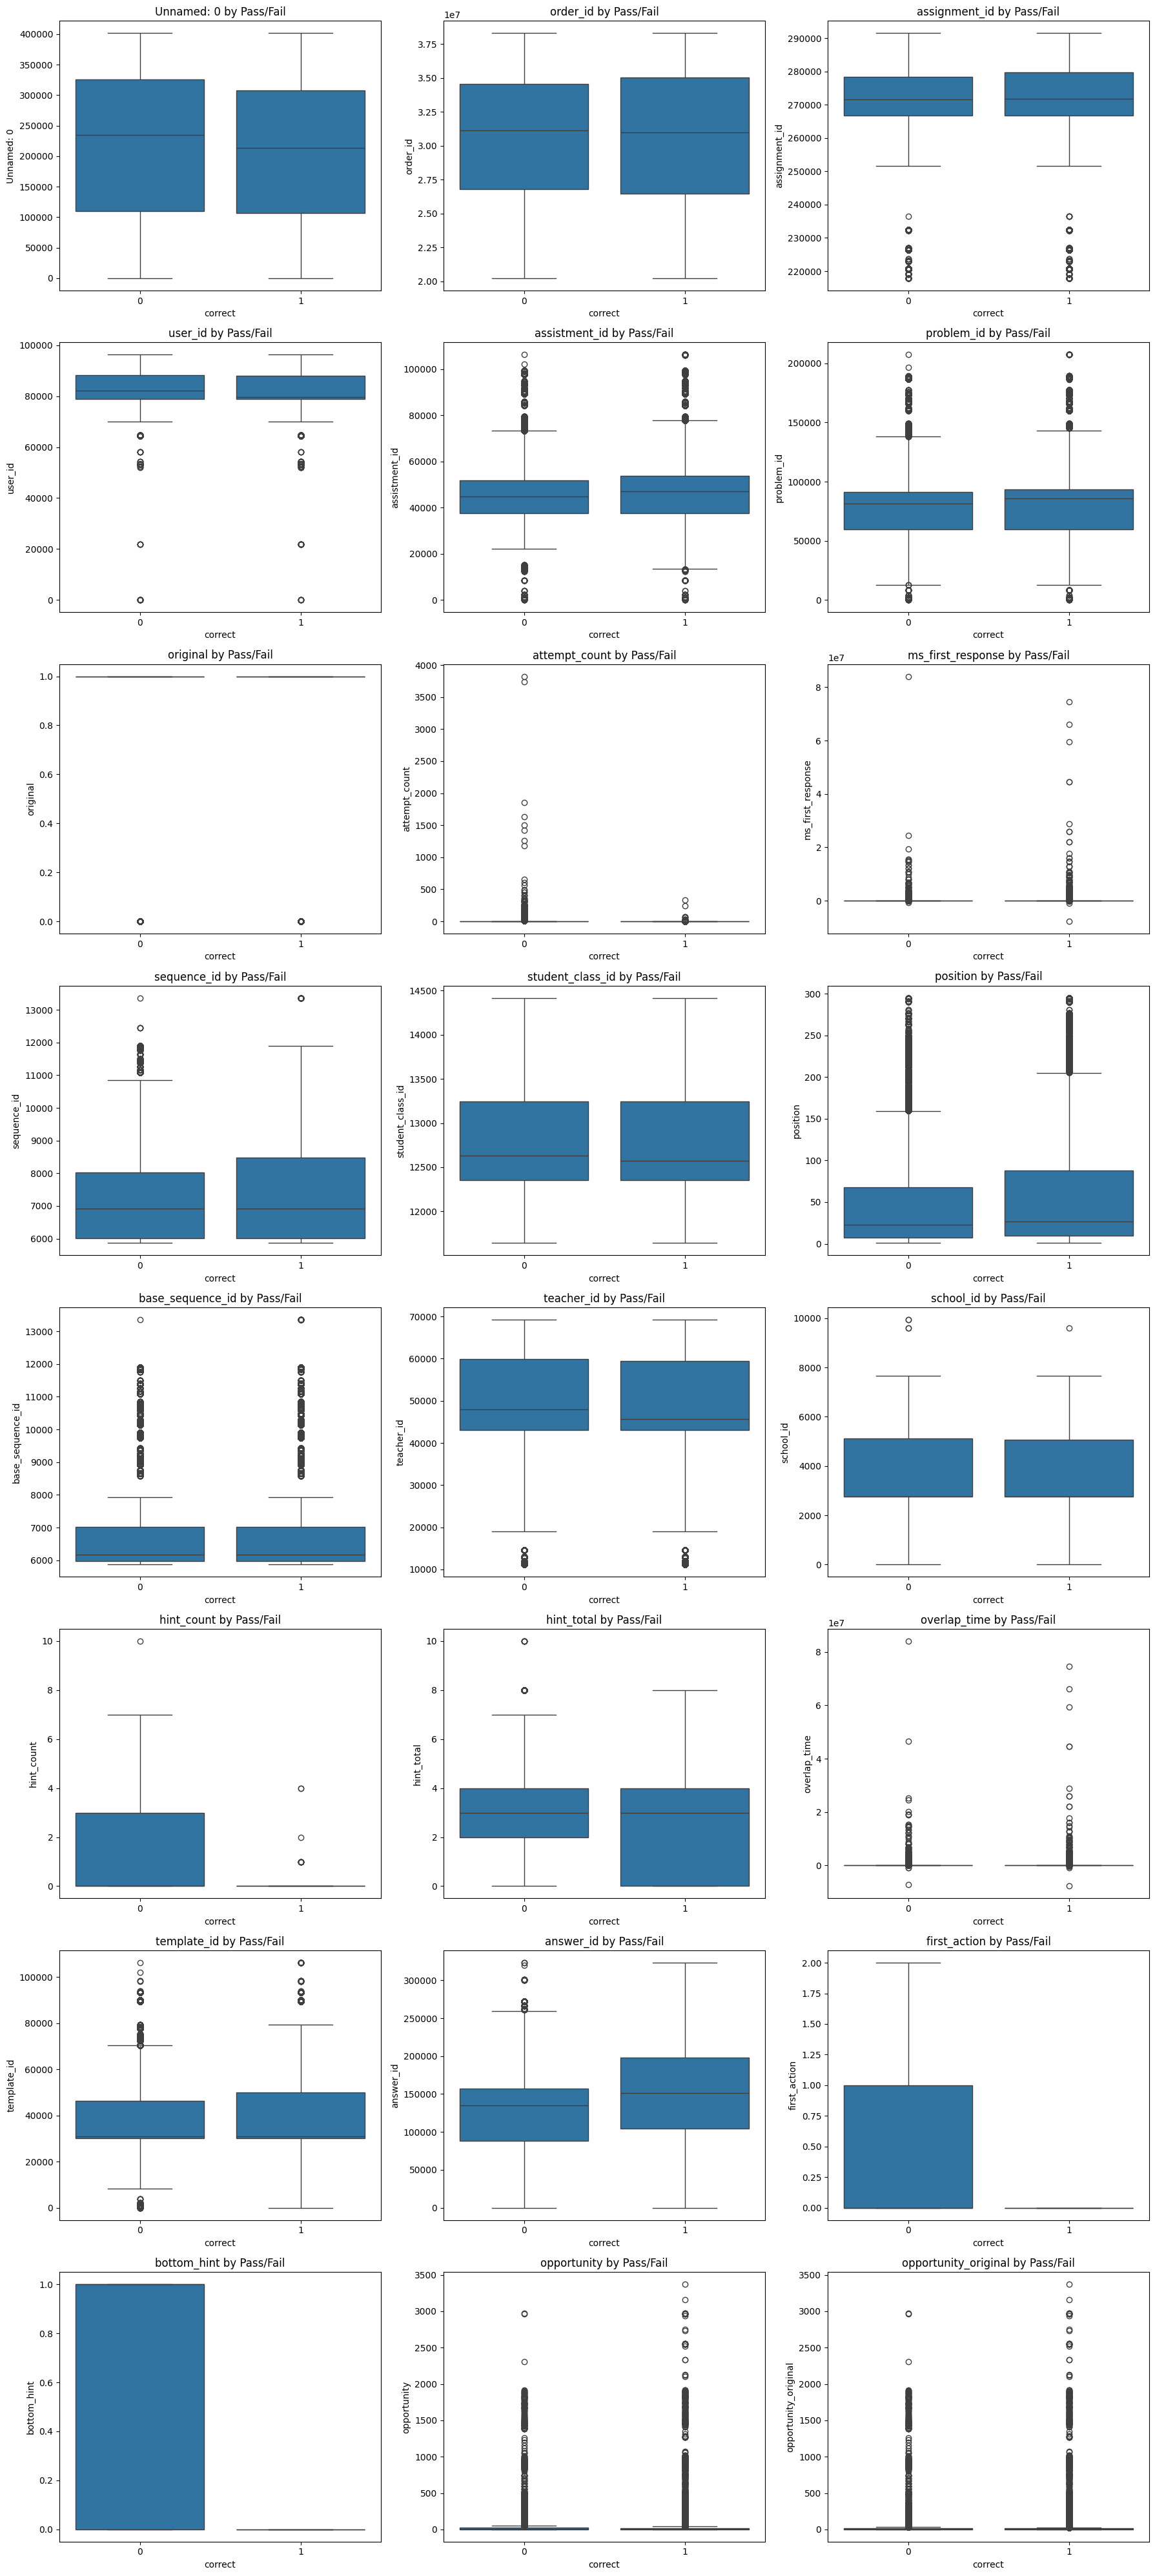

In [26]:
import math

# Remove the target column from the list
boxplot_cols = [col for col in numeric_cols if col != 'correct']

# Setup subplot grid
n_cols = 3
n_rows = math.ceil(len(boxplot_cols) / n_cols)
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# Create a boxplot for each feature
for idx, col in enumerate(boxplot_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x='correct', y=col, data=df)
    plt.title(f'{col} by Pass/Fail')

plt.tight_layout()
plt.savefig('../eda/combined_boxplots.png')
plt.show()

In [27]:
# Null Values Percentage
missing_percent = (df.isnull().sum() / df.shape[0]) * 100
print("\nMissing Values (%):\n", missing_percent[missing_percent > 0].sort_values(ascending=False))



Missing Values (%):
 answer_id               88.455861
bottom_hint             82.743182
answer_text             22.380788
skill_name              20.835496
opportunity_original    20.585251
skill_id                18.380615
dtype: float64
